In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import preprocessing

In [7]:
movie_data = pd.read_csv('../Dataset/IMDB-Movie-Data.csv',error_bad_lines = False, sep = ',')

In [8]:
movie_data = movie_data.dropna()

In [9]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [10]:
len(movie_data)

838

In [11]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [12]:
from sklearn.preprocessing import Binarizer

In [13]:
binarizer = Binarizer(threshold = 7).fit( movie_data[['Rating']])

In [14]:
movie_data['Rating'].round()

0      8.0
1      7.0
2      7.0
3      7.0
4      6.0
      ... 
993    6.0
994    7.0
996    6.0
997    6.0
999    5.0
Name: Rating, Length: 838, dtype: float64

In [15]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [16]:
binarizer_x = binarizer.transform(movie_data[['Rating']])

In [17]:
print(binarizer_x[0:10,:])

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [18]:
binary_rating_df = pd.DataFrame(data = binarizer_x, columns=['Binary Rating'])

In [19]:
binary_rating_df.head()

,Binary Rating
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [20]:
movie_data_updated = pd.concat([movie_data, binary_rating_df], axis=1)
movie_data_updated[['Title', 'Year', 'Rating', 'Binary Rating']].head(20)

,Title,Year,Rating,Binary Rating
0,Guardians of the Galaxy,2014.0,8.1,1.0
1,Prometheus,2012.0,7.0,0.0
2,Split,2016.0,7.3,1.0
3,Sing,2016.0,7.2,1.0
4,Suicide Squad,2016.0,6.2,0.0
5,The Great Wall,2016.0,6.1,0.0
6,La La Land,2016.0,8.3,1.0
7,NaN,NaN,NaN,1.0
8,The Lost City of Z,2016.0,7.1,0.0
9,Passengers,2016.0,7.0,1.0


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [23]:
# The MIN And MAX scalling technique

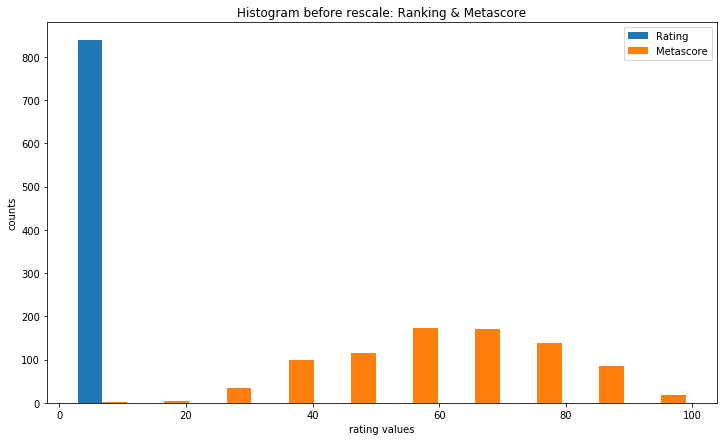

In [24]:
plt.figure(figsize = (12,7))
plt.hist([movie_data.Rating, movie_data.Metascore], bins=10, label=("Rating", "Metascore"))
plt.title('Histogram before rescale: Ranking & Metascore')
plt.legend(loc = 'best')
           
plt.xlabel('rating values')
plt.ylabel('counts')
           
plt.show()

In [25]:
scaler =MinMaxScaler(feature_range=(0,5))

In [26]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 5))

In [27]:
scaled_rating = scaler.fit_transform(movie_data[['Rating','Metascore']])

In [28]:
np.set_printoptions(precision=3)

In [29]:
print(scaled_rating[0:5,:])

[[4.366 3.652]
 [3.592 3.034]
 [3.803 2.865]
 [3.732 2.697]
 [3.028 1.629]]


In [30]:
rating_df = pd.DataFrame(data=scaled_rating, columns=['ScaledRanking', 'ScaledMetascore'])

In [31]:
rating_df.head()

,ScaledRanking,ScaledMetascore
0,4.366197,3.651685
1,3.591549,3.033708
2,3.802817,2.865169
3,3.732394,2.696629
4,3.028169,1.629213


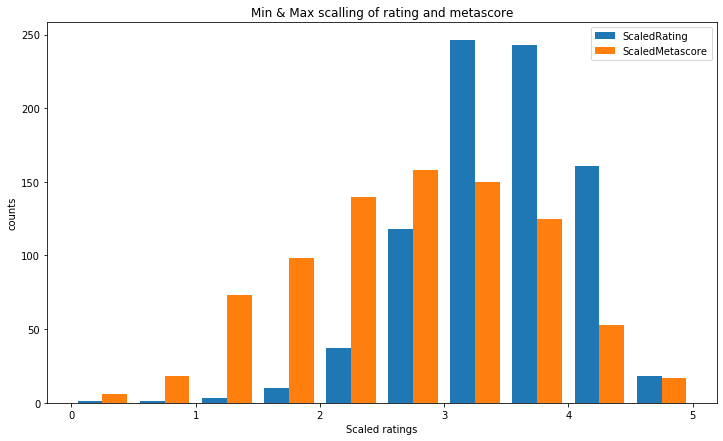

In [32]:
plt.figure(figsize = (12,7))
plt.hist([rating_df.ScaledRanking, rating_df.ScaledMetascore], bins=10, label=("ScaledRating", "ScaledMetascore"))
plt.title('Min & Max scalling of rating and metascore')
plt.legend(loc = 'best')
           
plt.xlabel('Scaled ratings')
plt.ylabel('counts')
           
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
movie_data[['Rating','Metascore','Revenue (Millions)']].head()

,Rating,Metascore,Revenue (Millions)
0,8.1,76.0,333.13
1,7.0,65.0,126.46
2,7.3,62.0,138.12
3,7.2,59.0,270.32
4,6.2,40.0,325.02


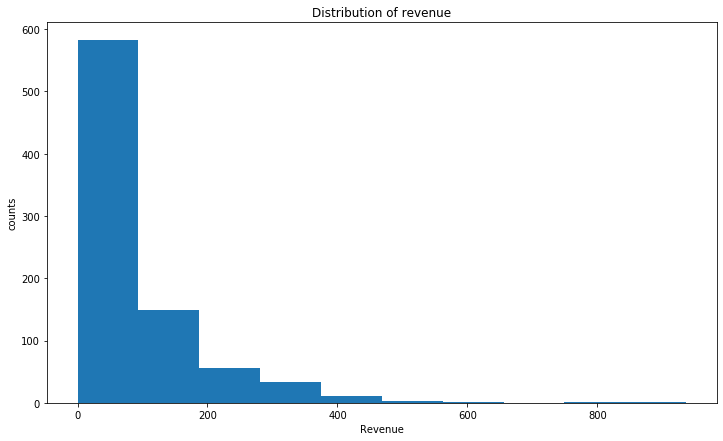

In [35]:
plt.figure(figsize = (12,7))
plt.hist(movie_data['Revenue (Millions)'], bins=10, label=("Revenue"))
plt.title('Distribution of revenue')           
plt.xlabel('Revenue')
plt.ylabel('counts')
           
plt.show()

In [36]:
heart_data = pd.read_csv('../Dataset/heart.csv', sep=',')

In [37]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
len(hear_data)

NameError: name 'hear_data' is not defined

In [39]:
from sklearn.preprocessing import Normalizer

In [40]:
x = heart_data[['age','trestbps','chol','thalach','oldpeak']]

In [41]:
x.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [42]:
x.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [43]:
array = x.values

In [44]:
array

array([[ 63. , 145. , 233. , 150. ,   2.3],
       [ 37. , 130. , 250. , 187. ,   3.5],
       [ 41. , 130. , 204. , 172. ,   1.4],
       ...,
       [ 68. , 144. , 193. , 141. ,   3.4],
       [ 57. , 130. , 131. , 115. ,   1.2],
       [ 57. , 130. , 236. , 174. ,   0. ]])

In [45]:
scaler = Normalizer().fit(array)

In [46]:
scaler.get_params

<bound method BaseEstimator.get_params of Normalizer(copy=True, norm='l2')>

In [47]:
normalizer_array = scaler.transform(array)

In [48]:
print(normalizer_array)

[[0.197 0.454 0.73  0.47  0.007]
 [0.109 0.382 0.735 0.55  0.01 ]
 [0.137 0.434 0.681 0.574 0.005]
 ...
 [0.237 0.501 0.672 0.491 0.012]
 [0.254 0.578 0.583 0.512 0.005]
 [0.175 0.399 0.724 0.534 0.   ]]


In [49]:
print(normalizer_array[0:5,:])

[[0.197 0.454 0.73  0.47  0.007]
 [0.109 0.382 0.735 0.55  0.01 ]
 [0.137 0.434 0.681 0.574 0.005]
 [0.173 0.37  0.729 0.55  0.002]
 [0.138 0.291 0.86  0.396 0.001]]


In [50]:
df = pd.DataFrame(data=normalizer_array)

In [51]:
column_names = ['age','trestbps','chol','thalach','oldpeak']

In [52]:
df.columns = column_names

In [53]:
df.head()

,age,trestbps,chol,thalach,oldpeak
0,0.197466,0.454485,0.730310,0.470156,0.007209
1,0.108753,0.382105,0.734817,0.549643,0.010287
2,0.136832,0.433857,0.680821,0.574026,0.004672
3,0.172888,0.370475,0.728601,0.549538,0.002470
4,0.138435,0.291442,0.859754,0.395876,0.001457


In [54]:
round(df, 2).head()

,age,trestbps,chol,thalach,oldpeak
0,0.20,0.45,0.73,0.47,0.01
1,0.11,0.38,0.73,0.55,0.01
2,0.14,0.43,0.68,0.57,0.00
3,0.17,0.37,0.73,0.55,0.00
4,0.14,0.29,0.86,0.40,0.00


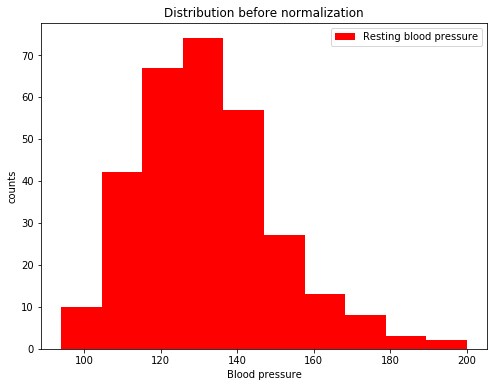

In [55]:
plt.figure(figsize=(8,6))
plt.hist(heart_data['trestbps'], facecolor = 'r', label='Resting blood pressure')
plt.title('Distribution before normalization')
plt.xlabel('Blood pressure')
plt.ylabel('counts')
plt.legend()
plt.show()

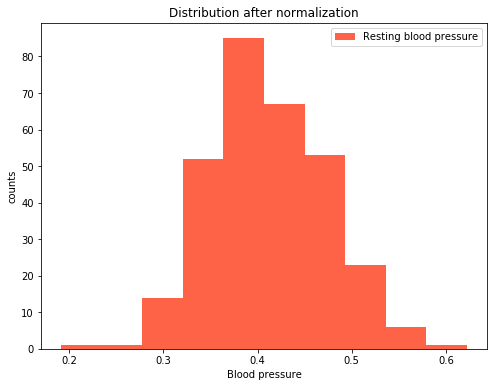

In [56]:
plt.figure(figsize=(8,6))
plt.hist(df['trestbps'], facecolor = 'tomato', label='Resting blood pressure')
plt.title('Distribution after normalization')
plt.xlabel('Blood pressure')
plt.ylabel('counts')
plt.legend()
plt.show()

In [57]:
from sklearn.preprocessing import MaxAbsScaler

In [58]:
x.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [59]:
scaler = MaxAbsScaler().fit(x)

In [60]:
scaler

MaxAbsScaler(copy=True)

In [61]:
scaler.max_abs_

array([ 77. , 200. , 564. , 202. ,   6.2])

In [62]:
maxabs_x = scaler.transform(x)

In [63]:
maxabs_x

array([[0.818, 0.725, 0.413, 0.743, 0.371],
       [0.481, 0.65 , 0.443, 0.926, 0.565],
       [0.532, 0.65 , 0.362, 0.851, 0.226],
       ...,
       [0.883, 0.72 , 0.342, 0.698, 0.548],
       [0.74 , 0.65 , 0.232, 0.569, 0.194],
       [0.74 , 0.65 , 0.418, 0.861, 0.   ]])

In [64]:
maxabs_df = df = pd.DataFrame(maxabs_x, columns=['age','trestbps','chol','thalach','oldpeak'])
maxabs_df.head()

,age,trestbps,chol,thalach,oldpeak
0,0.818182,0.725,0.413121,0.742574,0.370968
1,0.480519,0.650,0.443262,0.925743,0.564516
2,0.532468,0.650,0.361702,0.851485,0.225806
3,0.727273,0.600,0.418440,0.881188,0.129032
4,0.740260,0.600,0.627660,0.806931,0.096774


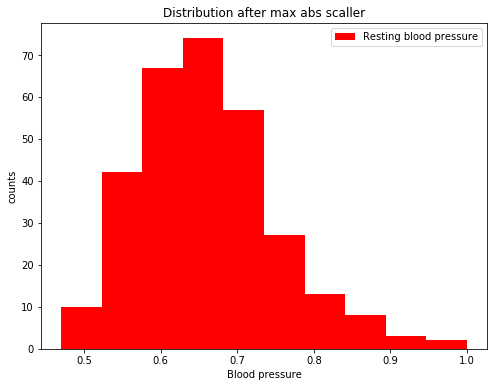

In [65]:
plt.figure(figsize=(8,6))
plt.hist(maxabs_df['trestbps'], facecolor = 'r', label='Resting blood pressure')
plt.title('Distribution after max abs scaller')
plt.xlabel('Blood pressure')
plt.ylabel('counts')
plt.legend()
plt.show()